# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
# env = UnityEnvironment(file_name="/home/arasdar/VisualBanana_Linux/Banana.x86")
env = UnityEnvironment(file_name="/home/arasdar/Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
# print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
# print(state.shape, len(env_info.vector_observations), env_info.vector_observations.shape)

Number of agents: 1
Number of actions: 4
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        print(state.shape)
        break
    
print("Score: {}".format(score))

(37,)
Score: 0.0


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    #print(state)
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


In [8]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.1
Default GPU Device: 


In [9]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
batch = []
while True: # infinite number of steps
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    #print(state, action, reward, done)
    batch.append([action, state, reward, done])
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: -1.0


In [10]:
batch[0], batch[0][1].shape

([1, array([1.        , 0.        , 0.        , 0.        , 0.20790455,
         0.        , 0.        , 1.        , 0.        , 0.01327663,
         1.        , 0.        , 0.        , 0.        , 0.1713129 ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 0.        , 1.        , 0.        , 0.01027161,
         0.        , 0.        , 1.        , 0.        , 0.02920904,
         0.        , 0.        , 1.        , 0.        , 0.00962341,
         0.        , 0.        ]), 0.0, False], (37,))

In [11]:
batch[0][1].shape

(37,)

In [12]:
batch[0]

[1, array([1.        , 0.        , 0.        , 0.        , 0.20790455,
        0.        , 0.        , 1.        , 0.        , 0.01327663,
        1.        , 0.        , 0.        , 0.        , 0.1713129 ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.01027161,
        0.        , 0.        , 1.        , 0.        , 0.02920904,
        0.        , 0.        , 1.        , 0.        , 0.00962341,
        0.        , 0.        ]), 0.0, False]

In [13]:
actions = np.array([each[0] for each in batch])
states = np.array([each[1] for each in batch])
rewards = np.array([each[2] for each in batch])
dones = np.array([each[3] for each in batch])
# infos = np.array([each[4] for each in batch])

In [14]:
# print(rewards[:])
print(np.array(rewards).shape, np.array(states).shape, np.array(actions).shape, np.array(dones).shape)
print(np.array(rewards).dtype, np.array(states).dtype, np.array(actions).dtype, np.array(dones).dtype)
print(np.max(np.array(actions)), np.min(np.array(actions)), 
      (np.max(np.array(actions)) - np.min(np.array(actions)))+1)
print(np.max(np.array(rewards)), np.min(np.array(rewards)))
print(np.max(np.array(states)), np.min(np.array(states)))

(300,) (300, 37) (300,) (300,)
float64 float64 int64 bool
3 0 4
0.0 -1.0
10.882210731506348 -10.516666412353516


In [16]:
def model_input(state_size):
    actions = tf.placeholder(tf.int32, [None], name='actions')
    states = tf.placeholder(tf.float32, [None, state_size], name='states')
    targetQs = tf.placeholder(tf.float32, [None], name='targetQs')
    return actions, states, targetQs

In [17]:
# Generator: Generating/prediting the actions
def generator(states, action_size, hidden_size, reuse=False, alpha=0.1, training=False):
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        h1 = tf.layers.dense(inputs=states, units=hidden_size)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        
        # Second fully connected layer
        h2 = tf.layers.dense(inputs=nl1, units=hidden_size)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
        
        # Output layer
        logits = tf.layers.dense(inputs=nl2, units=action_size)        
        #predictions = tf.nn.softmax(logits)

        # return actions logits
        return logits

In [18]:
def model_loss(actions, states, targetQs, # model input
               action_size, hidden_size): # model init
    actions_logits = generator(states=states, hidden_size=hidden_size, action_size=action_size)
    actions_labels = tf.one_hot(indices=actions, depth=action_size, dtype=actions_logits.dtype)
    Qs = tf.reduce_max(actions_logits*actions_labels, axis=1)
    loss = tf.reduce_mean(tf.square(Qs - targetQs))
    return actions_logits, loss

In [19]:
def model_opt(loss, learning_rate):
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): # Required for batchnorm (BN)
        opt = tf.train.AdamOptimizer(learning_rate).minimize(loss, var_list=g_vars)

    return opt

In [20]:
class Model:
    def __init__(self, state_size, action_size, hidden_size, learning_rate):

        # Data of the Model: make the data available inside the framework
        self.actions, self.states, self.targetQs = model_input(state_size=state_size)

        # Create the Model: calculating the loss and forwad pass
        self.actions_logits, self.loss = model_loss(
            action_size=action_size, hidden_size=hidden_size, # model init parameters
            states=self.states, actions=self.actions, targetQs=self.targetQs) # model input

        # Update the model: backward pass and backprop
        self.opt = model_opt(loss=self.loss, learning_rate=learning_rate)

In [21]:
from collections import deque
class Memory():
    def __init__(self, max_size = 1000):
        self.buffer = deque(maxlen=max_size)
    def sample(self, batch_size):
        idx = np.random.choice(np.arange(len(self.buffer)), 
                               size=batch_size, 
                               replace=False)
        return [self.buffer[ii] for ii in idx]

In [22]:
print('state size:{}'.format(states.shape), 
      'actions:{}'.format(actions.shape)) 
print('action size:{}'.format(np.max(actions) - np.min(actions)+1))

state size:(300, 37) actions:(300,)
action size:4


In [23]:
# Exploration parameters
explore_start = 1.0            # exploration probability at start
explore_stop = 0.01            # minimum exploration probability 
decay_rate = 0.0001            # exponential decay rate for exploration prob

# Network parameters
action_size = 4
state_size = 37
hidden_size = 37*4             # number of units in each Q-network hidden layer
learning_rate = 0.0001         # Q-network learning rate

# Memory parameters
memory_size = 10000            # memory capacity
batch_size = 20                # experience mini-batch size
gamma = 0.99                   # future reward discount

In [26]:
# Reset/init the graph/session
graph = tf.reset_default_graph()

# Init the model
model = Model(action_size=action_size, hidden_size=hidden_size, state_size=state_size, learning_rate=learning_rate)

# Init the memory
memory = Memory(max_size=memory_size)

In [27]:
# state = env.reset()
# for _ in range(batch_size):
#     action = env.action_space.sample()
#     next_state, reward, done, _ = env.step(action)
#     memory.buffer.append([state, action, next_state, reward, float(done)])
#     state = next_state
#     if done is True:
#         state = env.reset()

In [28]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]   # get the state
for _ in range(memory_size):
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    memory.buffer.append([state, action, next_state, reward, float(done)])
    state = next_state
    if done:                                       # exit loop if episode finished
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]   # get the state
        break

In [29]:
# Save/load the model and save for plotting
saver = tf.train.Saver()
episode_rewards_list, rewards_list, loss_list = [], [], []

# TF session for training
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    #saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    total_step = 0 # Explore or exploit parameter
    episode_reward = deque(maxlen=100) # 100 episodes average/running average/running mean/window
    
    # Training episodes/epochs
    for ep in range(11111):
        total_reward = 0
        loss_batch = []
        #state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]   # get the current state

        # Training steps/batches
        while True:
            # Explore (Env) or Exploit (Model)
            total_step += 1
            explore_p = explore_stop + (explore_start - explore_stop) * np.exp(-decay_rate * total_step) 
            if explore_p > np.random.rand():
                #action = env.action_space.sample()
                action = np.random.randint(action_size)        # select an action
            else:
                action_logits = sess.run(model.actions_logits, feed_dict={model.states: state.reshape([1, -1])})
                action = np.argmax(action_logits)
            #state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            memory.buffer.append([state, action, next_state, reward, float(done)])
            total_reward += reward
            state = next_state
            
            # Training
            batch = memory.sample(batch_size)
            states = np.array([each[0] for each in batch])
            actions = np.array([each[1] for each in batch])
            next_states = np.array([each[2] for each in batch])
            rewards = np.array([each[3] for each in batch])
            dones = np.array([each[4] for each in batch])
            next_actions_logits = sess.run(model.actions_logits, feed_dict = {model.states: next_states})
            nextQs = np.max(next_actions_logits, axis=1) * (1-dones)
            targetQs = rewards + (gamma * nextQs)
            loss, _ = sess.run([model.loss, model.opt], feed_dict = {model.states: states, 
                                                                     model.actions: actions,
                                                                     model.targetQs: targetQs})
            loss_batch.append(loss)
            if done is True:
                break
                
        episode_reward.append(total_reward)
        print('Episode:{}'.format(ep),
              'meanR:{:.4f}'.format(np.mean(episode_reward)),
              'R:{}'.format(total_reward),
              'loss:{:.4f}'.format(np.mean(loss_batch)),
              'exploreP:{:.4f}'.format(explore_p))
        # Ploting out
        episode_rewards_list.append([ep, np.mean(episode_reward)])
        rewards_list.append([ep, total_reward])
        loss_list.append([ep, np.mean(loss_batch)])
        # Break episode/epoch loop
        if np.mean(episode_reward) >= +13:
            break
            
    # At the end of all training episodes/epochs
    saver.save(sess, 'checkpoints/model-nav.ckpt')

Episode:0 meanR:2.0000 R:2.0 loss:12.5469 exploreP:0.9707
Episode:1 meanR:1.5000 R:1.0 loss:1114.4866 exploreP:0.9423
Episode:2 meanR:1.3333 R:1.0 loss:13103.1416 exploreP:0.9148
Episode:3 meanR:0.5000 R:-2.0 loss:34559.1445 exploreP:0.8881
Episode:4 meanR:0.8000 R:2.0 loss:54251.0859 exploreP:0.8621
Episode:5 meanR:0.6667 R:0.0 loss:42695.1484 exploreP:0.8369
Episode:6 meanR:0.7143 R:1.0 loss:40275.0859 exploreP:0.8125
Episode:7 meanR:0.8750 R:2.0 loss:32052.2734 exploreP:0.7888
Episode:8 meanR:0.6667 R:-1.0 loss:32957.8984 exploreP:0.7657
Episode:9 meanR:0.6000 R:0.0 loss:48621.6133 exploreP:0.7434
Episode:10 meanR:0.5455 R:0.0 loss:40616.1523 exploreP:0.7217
Episode:11 meanR:0.7500 R:3.0 loss:36226.4844 exploreP:0.7007
Episode:12 meanR:0.5385 R:-2.0 loss:41154.7656 exploreP:0.6803
Episode:13 meanR:0.4286 R:-1.0 loss:39051.3672 exploreP:0.6605
Episode:14 meanR:0.4000 R:0.0 loss:32967.0469 exploreP:0.6413
Episode:15 meanR:0.3125 R:-1.0 loss:33499.6797 exploreP:0.6226
Episode:16 meanR:

Episode:137 meanR:0.3900 R:-1.0 loss:0.3117 exploreP:0.0258
Episode:138 meanR:0.4000 R:1.0 loss:0.5381 exploreP:0.0253
Episode:139 meanR:0.3900 R:1.0 loss:0.4454 exploreP:0.0248
Episode:140 meanR:0.4200 R:3.0 loss:0.7132 exploreP:0.0244
Episode:141 meanR:0.4300 R:0.0 loss:0.2417 exploreP:0.0240
Episode:142 meanR:0.4300 R:0.0 loss:0.2694 exploreP:0.0236
Episode:143 meanR:0.4200 R:-3.0 loss:0.3638 exploreP:0.0232
Episode:144 meanR:0.4600 R:3.0 loss:0.8998 exploreP:0.0228
Episode:145 meanR:0.4800 R:0.0 loss:0.9593 exploreP:0.0224
Episode:146 meanR:0.4600 R:-2.0 loss:0.6534 exploreP:0.0220
Episode:147 meanR:0.4500 R:-1.0 loss:0.2267 exploreP:0.0217
Episode:148 meanR:0.4800 R:0.0 loss:0.1228 exploreP:0.0213
Episode:149 meanR:0.5000 R:1.0 loss:0.2629 exploreP:0.0210
Episode:150 meanR:0.4800 R:-1.0 loss:0.3350 exploreP:0.0207
Episode:151 meanR:0.4600 R:-2.0 loss:0.4525 exploreP:0.0204
Episode:152 meanR:0.4500 R:0.0 loss:0.2404 exploreP:0.0201
Episode:153 meanR:0.4700 R:0.0 loss:0.1788 explore

Episode:276 meanR:1.2000 R:0.0 loss:0.4734 exploreP:0.0102
Episode:277 meanR:1.2300 R:4.0 loss:0.6101 exploreP:0.0102
Episode:278 meanR:1.2700 R:3.0 loss:0.9001 exploreP:0.0102
Episode:279 meanR:1.2900 R:0.0 loss:0.2434 exploreP:0.0102
Episode:280 meanR:1.3300 R:3.0 loss:0.1088 exploreP:0.0102
Episode:281 meanR:1.3900 R:6.0 loss:0.1314 exploreP:0.0102
Episode:282 meanR:1.4200 R:5.0 loss:0.3440 exploreP:0.0102
Episode:283 meanR:1.4600 R:4.0 loss:0.2271 exploreP:0.0102
Episode:284 meanR:1.4500 R:0.0 loss:0.2033 exploreP:0.0102
Episode:285 meanR:1.4700 R:2.0 loss:0.1213 exploreP:0.0102
Episode:286 meanR:1.5000 R:3.0 loss:0.2270 exploreP:0.0102
Episode:287 meanR:1.4800 R:-2.0 loss:0.3349 exploreP:0.0102
Episode:288 meanR:1.4400 R:-1.0 loss:0.1941 exploreP:0.0102
Episode:289 meanR:1.4700 R:3.0 loss:0.1178 exploreP:0.0102
Episode:290 meanR:1.4800 R:3.0 loss:0.2597 exploreP:0.0102
Episode:291 meanR:1.5500 R:5.0 loss:0.1883 exploreP:0.0102
Episode:292 meanR:1.6000 R:5.0 loss:0.1465 exploreP:0.

Episode:415 meanR:4.3500 R:6.0 loss:0.0588 exploreP:0.0100
Episode:416 meanR:4.4200 R:7.0 loss:0.0855 exploreP:0.0100
Episode:417 meanR:4.4700 R:9.0 loss:0.0975 exploreP:0.0100
Episode:418 meanR:4.4200 R:3.0 loss:0.1156 exploreP:0.0100
Episode:419 meanR:4.4000 R:8.0 loss:0.1387 exploreP:0.0100
Episode:420 meanR:4.4300 R:10.0 loss:0.1041 exploreP:0.0100
Episode:421 meanR:4.4100 R:2.0 loss:0.1480 exploreP:0.0100
Episode:422 meanR:4.4000 R:1.0 loss:0.1303 exploreP:0.0100
Episode:423 meanR:4.3400 R:0.0 loss:0.1552 exploreP:0.0100
Episode:424 meanR:4.4100 R:8.0 loss:0.1128 exploreP:0.0100
Episode:425 meanR:4.4300 R:6.0 loss:0.1558 exploreP:0.0100
Episode:426 meanR:4.5000 R:7.0 loss:0.0793 exploreP:0.0100
Episode:427 meanR:4.5200 R:4.0 loss:0.1397 exploreP:0.0100
Episode:428 meanR:4.5900 R:7.0 loss:0.1402 exploreP:0.0100
Episode:429 meanR:4.6400 R:5.0 loss:0.0907 exploreP:0.0100
Episode:430 meanR:4.7100 R:12.0 loss:0.1143 exploreP:0.0100
Episode:431 meanR:4.8000 R:9.0 loss:0.1104 exploreP:0.

Episode:554 meanR:6.4400 R:2.0 loss:0.0964 exploreP:0.0100
Episode:555 meanR:6.5000 R:8.0 loss:0.0813 exploreP:0.0100
Episode:556 meanR:6.6400 R:14.0 loss:0.0815 exploreP:0.0100
Episode:557 meanR:6.6900 R:6.0 loss:0.0826 exploreP:0.0100
Episode:558 meanR:6.6800 R:2.0 loss:0.0692 exploreP:0.0100
Episode:559 meanR:6.7100 R:8.0 loss:0.0571 exploreP:0.0100
Episode:560 meanR:6.6600 R:7.0 loss:0.0776 exploreP:0.0100
Episode:561 meanR:6.7600 R:13.0 loss:0.0941 exploreP:0.0100
Episode:562 meanR:6.7900 R:10.0 loss:0.1142 exploreP:0.0100
Episode:563 meanR:6.7900 R:8.0 loss:0.0823 exploreP:0.0100
Episode:564 meanR:6.9000 R:13.0 loss:0.1074 exploreP:0.0100
Episode:565 meanR:6.9200 R:5.0 loss:0.1035 exploreP:0.0100
Episode:566 meanR:6.9400 R:6.0 loss:0.0886 exploreP:0.0100
Episode:567 meanR:7.0100 R:7.0 loss:0.0894 exploreP:0.0100
Episode:568 meanR:6.9400 R:6.0 loss:0.1215 exploreP:0.0100
Episode:569 meanR:6.9200 R:6.0 loss:0.0792 exploreP:0.0100
Episode:570 meanR:6.8800 R:9.0 loss:0.1084 exploreP:

Episode:693 meanR:8.8000 R:3.0 loss:0.1274 exploreP:0.0100
Episode:694 meanR:8.7600 R:12.0 loss:0.0661 exploreP:0.0100
Episode:695 meanR:8.7900 R:13.0 loss:0.1033 exploreP:0.0100
Episode:696 meanR:8.8800 R:11.0 loss:0.0896 exploreP:0.0100
Episode:697 meanR:8.9500 R:16.0 loss:0.0807 exploreP:0.0100
Episode:698 meanR:9.0100 R:9.0 loss:0.0969 exploreP:0.0100
Episode:699 meanR:8.9400 R:6.0 loss:0.0940 exploreP:0.0100
Episode:700 meanR:8.9100 R:8.0 loss:0.0992 exploreP:0.0100
Episode:701 meanR:9.0700 R:20.0 loss:0.0898 exploreP:0.0100
Episode:702 meanR:9.0400 R:6.0 loss:0.0896 exploreP:0.0100
Episode:703 meanR:8.9900 R:11.0 loss:0.1342 exploreP:0.0100
Episode:704 meanR:9.0700 R:12.0 loss:0.1007 exploreP:0.0100
Episode:705 meanR:8.9300 R:3.0 loss:0.1240 exploreP:0.0100
Episode:706 meanR:8.9900 R:11.0 loss:0.0977 exploreP:0.0100
Episode:707 meanR:8.9500 R:8.0 loss:0.1291 exploreP:0.0100
Episode:708 meanR:8.9700 R:4.0 loss:0.0946 exploreP:0.0100
Episode:709 meanR:9.0400 R:13.0 loss:0.0943 expl

Episode:830 meanR:10.9200 R:14.0 loss:0.1078 exploreP:0.0100
Episode:831 meanR:10.8800 R:9.0 loss:0.1176 exploreP:0.0100
Episode:832 meanR:10.8600 R:12.0 loss:0.0858 exploreP:0.0100
Episode:833 meanR:10.8600 R:9.0 loss:0.1284 exploreP:0.0100
Episode:834 meanR:10.8800 R:11.0 loss:0.1001 exploreP:0.0100
Episode:835 meanR:10.8700 R:8.0 loss:0.0964 exploreP:0.0100
Episode:836 meanR:10.9800 R:12.0 loss:0.1026 exploreP:0.0100
Episode:837 meanR:11.0400 R:14.0 loss:0.0858 exploreP:0.0100
Episode:838 meanR:11.1100 R:15.0 loss:0.0920 exploreP:0.0100
Episode:839 meanR:11.0900 R:9.0 loss:0.0952 exploreP:0.0100
Episode:840 meanR:11.1500 R:16.0 loss:0.1127 exploreP:0.0100
Episode:841 meanR:11.2000 R:18.0 loss:0.0863 exploreP:0.0100
Episode:842 meanR:11.3100 R:19.0 loss:0.0878 exploreP:0.0100
Episode:843 meanR:11.2900 R:7.0 loss:0.0765 exploreP:0.0100
Episode:844 meanR:11.3100 R:10.0 loss:0.0951 exploreP:0.0100
Episode:845 meanR:11.2400 R:7.0 loss:0.0864 exploreP:0.0100
Episode:846 meanR:11.1900 R:8.

Episode:966 meanR:9.9100 R:15.0 loss:0.0706 exploreP:0.0100
Episode:967 meanR:9.8900 R:9.0 loss:0.1065 exploreP:0.0100
Episode:968 meanR:9.8900 R:9.0 loss:0.0984 exploreP:0.0100
Episode:969 meanR:9.8600 R:12.0 loss:0.0975 exploreP:0.0100
Episode:970 meanR:9.8600 R:9.0 loss:0.1020 exploreP:0.0100
Episode:971 meanR:9.8900 R:15.0 loss:0.1159 exploreP:0.0100
Episode:972 meanR:9.8900 R:12.0 loss:0.0900 exploreP:0.0100
Episode:973 meanR:9.9700 R:9.0 loss:0.0946 exploreP:0.0100
Episode:974 meanR:9.9300 R:7.0 loss:0.0970 exploreP:0.0100
Episode:975 meanR:10.0500 R:14.0 loss:0.0972 exploreP:0.0100
Episode:976 meanR:10.0800 R:10.0 loss:0.0679 exploreP:0.0100
Episode:977 meanR:10.1200 R:11.0 loss:0.0776 exploreP:0.0100
Episode:978 meanR:10.1300 R:17.0 loss:0.0964 exploreP:0.0100
Episode:979 meanR:10.1700 R:14.0 loss:0.0879 exploreP:0.0100
Episode:980 meanR:10.1400 R:4.0 loss:0.0815 exploreP:0.0100
Episode:981 meanR:10.2600 R:16.0 loss:0.0762 exploreP:0.0100
Episode:982 meanR:10.3000 R:9.0 loss:0.

Episode:1100 meanR:10.8700 R:14.0 loss:0.0778 exploreP:0.0100
Episode:1101 meanR:10.8700 R:10.0 loss:0.0878 exploreP:0.0100
Episode:1102 meanR:10.8500 R:8.0 loss:0.0882 exploreP:0.0100
Episode:1103 meanR:10.8700 R:8.0 loss:0.1011 exploreP:0.0100
Episode:1104 meanR:10.9600 R:14.0 loss:0.0856 exploreP:0.0100
Episode:1105 meanR:10.9400 R:12.0 loss:0.1031 exploreP:0.0100
Episode:1106 meanR:10.8900 R:13.0 loss:0.0845 exploreP:0.0100
Episode:1107 meanR:10.8300 R:7.0 loss:0.0942 exploreP:0.0100
Episode:1108 meanR:10.7600 R:3.0 loss:0.0749 exploreP:0.0100
Episode:1109 meanR:10.8500 R:16.0 loss:0.0928 exploreP:0.0100
Episode:1110 meanR:10.8300 R:13.0 loss:0.0632 exploreP:0.0100
Episode:1111 meanR:10.9200 R:15.0 loss:0.0829 exploreP:0.0100
Episode:1112 meanR:10.9000 R:6.0 loss:0.0605 exploreP:0.0100
Episode:1113 meanR:10.9400 R:14.0 loss:0.1048 exploreP:0.0100
Episode:1114 meanR:10.9100 R:15.0 loss:0.0853 exploreP:0.0100
Episode:1115 meanR:10.9200 R:15.0 loss:0.0967 exploreP:0.0100
Episode:1116 

Episode:1233 meanR:12.1900 R:14.0 loss:0.1038 exploreP:0.0100
Episode:1234 meanR:12.2400 R:13.0 loss:0.1051 exploreP:0.0100
Episode:1235 meanR:12.2300 R:10.0 loss:0.0886 exploreP:0.0100
Episode:1236 meanR:12.2100 R:7.0 loss:0.1229 exploreP:0.0100
Episode:1237 meanR:12.2400 R:14.0 loss:0.0943 exploreP:0.0100
Episode:1238 meanR:12.2600 R:8.0 loss:0.1145 exploreP:0.0100
Episode:1239 meanR:12.3400 R:15.0 loss:0.1023 exploreP:0.0100
Episode:1240 meanR:12.2500 R:5.0 loss:0.0968 exploreP:0.0100
Episode:1241 meanR:12.2600 R:10.0 loss:0.1134 exploreP:0.0100
Episode:1242 meanR:12.3500 R:16.0 loss:0.1156 exploreP:0.0100
Episode:1243 meanR:12.3500 R:17.0 loss:0.1209 exploreP:0.0100
Episode:1244 meanR:12.3000 R:1.0 loss:0.1055 exploreP:0.0100
Episode:1245 meanR:12.3400 R:15.0 loss:0.0966 exploreP:0.0100
Episode:1246 meanR:12.3000 R:9.0 loss:0.1107 exploreP:0.0100
Episode:1247 meanR:12.3500 R:15.0 loss:0.0895 exploreP:0.0100
Episode:1248 meanR:12.3300 R:5.0 loss:0.0887 exploreP:0.0100
Episode:1249 m

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

Text(0,0.5,'Total rewards')

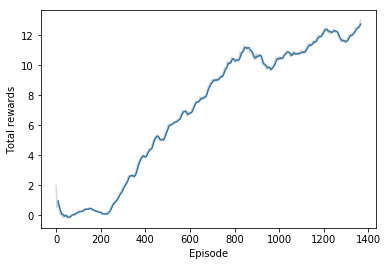

In [34]:
eps, arr = np.array(episode_rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0,0.5,'Total rewards')

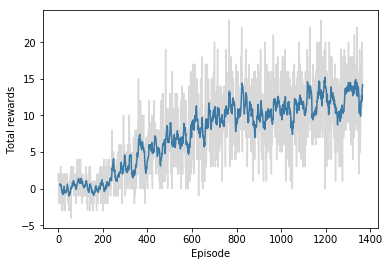

In [35]:
eps, arr = np.array(rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0,0.5,'Average losses')

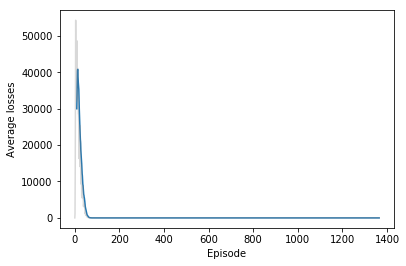

In [36]:
eps, arr = np.array(loss_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Average losses')

In [37]:
# TF session for training
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    # Testing episodes/epochs
    for _ in range(1):
        total_reward = 0
        #state = env.reset()
        env_info = env.reset(train_mode=False)[brain_name] # reset the environment
        state = env_info.vector_observations[0]   # get the current state

        # Testing steps/batches
        while True:
            action_logits = sess.run(model.actions_logits, feed_dict={model.states: state.reshape([1, -1])})
            action = np.argmax(action_logits)
            #state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            total_reward += reward
            if done:
                break
                
        print('total_reward: {:.2f}'.format(total_reward))

INFO:tensorflow:Restoring parameters from checkpoints/model-nav.ckpt


total_reward: 14.00


In [ ]:
# Be careful!!!!!!!!!!!!!!!!
# Closing the env
env.close()